# Final Project- NYC Housing
## By: Hillary Fitts, Diandre Clarke, and Disha Hemantbhai

### With this project we will take a look at real estate in New York City. One of the housing pieces we will touch upon will be the average sale price over the years. In addition, we will also cover how the Neighborhood forces a higher price tag for the real estate property.     

* Topics we will cover: 
+ Trends: Residential & Commercial
+ Sale Price 
+ Borough
+ Correlation between Sale Price and Land Sq. Feet
+ 
+ Year built vs Sale Price
+ Total Units vs Residential/Commercial
+ Borough



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline
plt.style.use('ggplot')

In [6]:
col_names = ['Borough', 'Neighborhood', 'Building_Class_Category', 'Tax_Class_Current', 'Block', 'Lot', 'EaseMent', 'Building_Class_Current', 'Address', 'Apt._No.', 'Zip_Code', 'Residential_Units', 'Commercial_Units', 'Total_Units', 'Land_Sq_Ft', 'Gross_Sq_Ft', 'Year_Built', 'Tax_Class_AtSale', 'Building_Class_AtSale', 'Sale_Price', 'Sale_Date']
data=pd.read_csv("NYC_Housing_2018.csv", header=0, parse_dates=True, index_col='Sale_Date', names=col_names,  na_values=[' ', ' $-   '])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82140 entries, 2018-05-22 to 2017-11-30
Data columns (total 20 columns):
Borough                    82140 non-null int64
Neighborhood               82140 non-null object
Building_Class_Category    82140 non-null object
Tax_Class_Current          82073 non-null object
Block                      82140 non-null int64
Lot                        82140 non-null int64
EaseMent                   0 non-null float64
Building_Class_Current     82073 non-null object
Address                    82140 non-null object
Apt._No.                   18587 non-null object
Zip_Code                   82140 non-null int64
Residential_Units          82140 non-null int64
Commercial_Units           82140 non-null int64
Total_Units                82140 non-null int64
Land_Sq_Ft                 47349 non-null float64
Gross_Sq_Ft                44890 non-null float64
Year_Built                 75696 non-null float64
Tax_Class_AtSale           82140 non-null int64


,Borough,Neighborhood,Building_Class_Category,Tax_Class_Current,Block,Lot,EaseMent,Building_Class_Current,Address,Apt._No.,Zip_Code,Residential_Units,Commercial_Units,Total_Units,Land_Sq_Ft,Gross_Sq_Ft,Year_Built,Tax_Class_AtSale,Building_Class_AtSale,Sale_Price
Sale_Date,,,,,,,,,,,,,,,,,,,,
2018-05-22,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,10009,1,0,1,987.0,2183.0,1860.0,1,A4,4844809.0
2018-05-23,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,10009,1,0,1,987.0,2183.0,1860.0,1,A4,NaN
2018-04-25,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,NaN,B1,113 AVENUE C,NaN,10009,2,0,2,1218.0,4764.0,1899.0,1,B1,NaN
2018-09-07,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,2,NaN,C7,21-23 AVENUE B,NaN,10009,12,4,16,4186.0,10588.0,1900.0,2,C7,10350000.0
2018-09-05,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,389,18,NaN,C1,200 EAST 7TH STREET,NaN,10009,18,0,18,2271.0,10650.0,1910.0,2,C1,5000000.0


In [7]:
data.drop(['EaseMent', 'Apt._No.'], axis=1, inplace=True)
data.dropna(axis=0, how='any', inplace=True)
data['Borough'] = data.Borough.astype(str)
data['Block'] = data.Block.astype(str)
data['Lot'] = data.Lot.astype(str)
data['Zip_Code'] = data.Zip_Code.astype(str)
data['Tax_Class_AtSale'] = data.Tax_Class_AtSale.astype(str)
data['Year_Built'] = data.Year_Built.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29028 entries, 2018-05-22 to 2017-11-30
Data columns (total 18 columns):
Borough                    29028 non-null object
Neighborhood               29028 non-null object
Building_Class_Category    29028 non-null object
Tax_Class_Current          29028 non-null object
Block                      29028 non-null object
Lot                        29028 non-null object
Building_Class_Current     29028 non-null object
Address                    29028 non-null object
Zip_Code                   29028 non-null object
Residential_Units          29028 non-null int64
Commercial_Units           29028 non-null int64
Total_Units                29028 non-null int64
Land_Sq_Ft                 29028 non-null float64
Gross_Sq_Ft                29028 non-null float64
Year_Built                 29028 non-null int64
Tax_Class_AtSale           29028 non-null object
Building_Class_AtSale      29028 non-null object
Sale_Price                 29028 non-null f

In [8]:
df= data[(data.Sale_Price >= 100000) & (data.Sale_Price <= 10000000)].copy()
df.shape
df.describe()

,Residential_Units,Commercial_Units,Total_Units,Land_Sq_Ft,Gross_Sq_Ft,Year_Built,Sale_Price
count,27239.000000,27239.000000,27239.000000,27239.000000,27239.000000,27239.000000,2.723900e+04
mean,2.051030,0.131539,2.182569,3316.696758,2542.732406,1940.910900,9.765255e+05
std,3.433395,0.770531,3.534787,10202.737152,5085.217419,29.946681,1.100990e+06
min,0.000000,0.000000,0.000000,200.000000,120.000000,1800.000000,1.000000e+05
25%,1.000000,0.000000,1.000000,2000.000000,1349.000000,1920.000000,4.850000e+05
50%,2.000000,0.000000,2.000000,2500.000000,1831.000000,1930.000000,6.800000e+05
75%,2.000000,0.000000,2.000000,3840.000000,2551.500000,1960.000000,9.888880e+05
max,134.000000,42.000000,134.000000,970000.000000,285471.000000,2018.000000,1.000000e+07


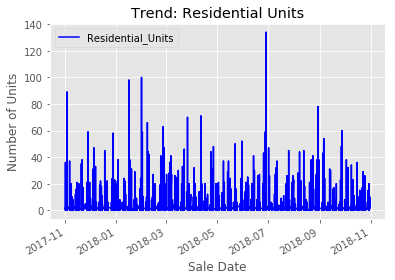

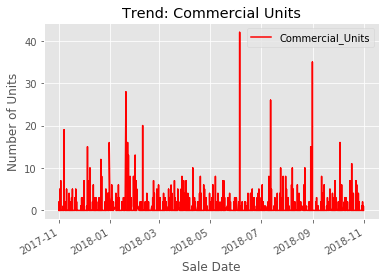

In [9]:
df.plot(y='Residential_Units', use_index=True, color='blue')
plt.title('Trend: Residential Units')
plt.xlabel('Sale Date')
plt.ylabel('Number of Units')

df.plot(y='Commercial_Units', use_index=True, color='red')
plt.title('Trend: Commercial Units')
plt.xlabel('Sale Date')
plt.ylabel('Number of Units')

plt.show()

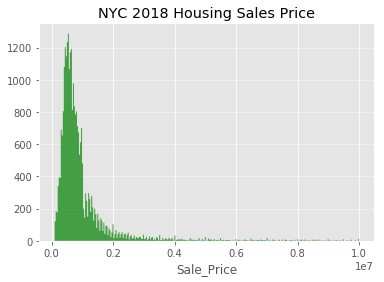

In [10]:
#Plot histogram of Sale Price
plt.hist(df.Sale_Price, bins=300, histtype='stepfilled', alpha=0.7, color='green', rwidth=1)
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Sale Price')
plt.ylabel('')
plt.title('NYC 2018 Housing Sales Price')
plt.show()

In [11]:
#Look at Borough's in New York City
df['Borough'].value_counts()

4    10727
3     7673
5     4732
2     3601
1      506
Name: Borough, dtype: int64

Text(0.5, 0, 'Real Estate Properties')

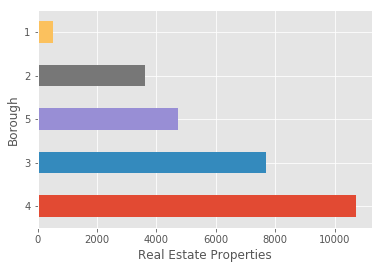

In [12]:
#Plot the Bar chart of the different Boroughs in NYC
df['Borough'].value_counts().plot.barh()
plt.ylabel('Borough')
plt.xlabel('Real Estate Properties')

In [13]:
df['Building_Class_Category'].value_counts()

01 ONE FAMILY DWELLINGS                        12440
02 TWO FAMILY DWELLINGS                         9524
03 THREE FAMILY DWELLINGS                       2331
07 RENTALS - WALKUP APARTMENTS                  1472
22 STORE BUILDINGS                               468
14 RENTALS - 4-10 UNIT                           299
30 WAREHOUSES                                    136
21 OFFICE BUILDINGS                              126
29 COMMERCIAL GARAGES                            117
27 FACTORIES                                      87
37 RELIGIOUS FACILITIES                           67
08 RENTALS - ELEVATOR APARTMENTS                  61
35 INDOOR PUBLIC AND CULTURAL FACILITIES          24
33 EDUCATIONAL FACILITIES                         21
32 HOSPITAL AND HEALTH FACILITIES                 20
38 ASYLUMS AND HOMES                              15
41 TAX CLASS 4 - OTHER                            12
23 LOFT BUILDINGS                                  7
26 OTHER HOTELS                               

Text(0.5, 0, 'Properties')

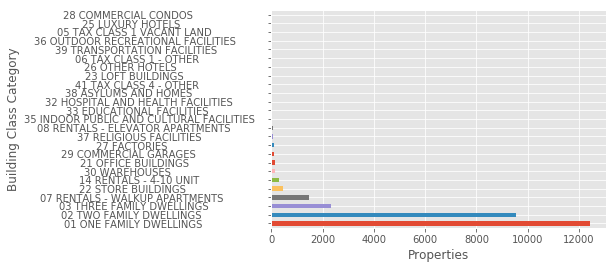

In [14]:
#Plot the Bar chart of the different zip codes in NYC
df['Building_Class_Category'].value_counts().plot.barh()
plt.ylabel('Building Class Category')
plt.xlabel('Properties')

### We have analyzed various trends in the NYC Housing market thus far.##
A trend we wanted to identify is the
positive correlation between **sale price** of the housing and **the sq ft of the land**. We hypothesized that
_the more land space the higher the sale price , because in CT we see a strong positive relation
with sq foot and price._

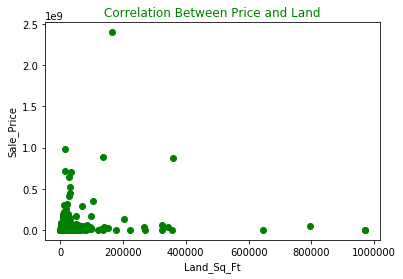

In [55]:
#Use a scatterplot to relfect the correation between Land_Sq_Ft and Sale_Price
x= data.Land_Sq_Ft
y= data.Sale_Price

plt.xlabel('Land_Sq_Ft')
plt.ylabel('Sale_Price')
plt.title('Correlation Between Price and Land',color='g')
plt.scatter(x,y, c='g')


## Our scatterplot allowed us to see reject our hypothesis. In NYC Housing market, the land sq ft does not have a strong positive relationship with sale price.

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a04a5ee48>,
      dtype=object)

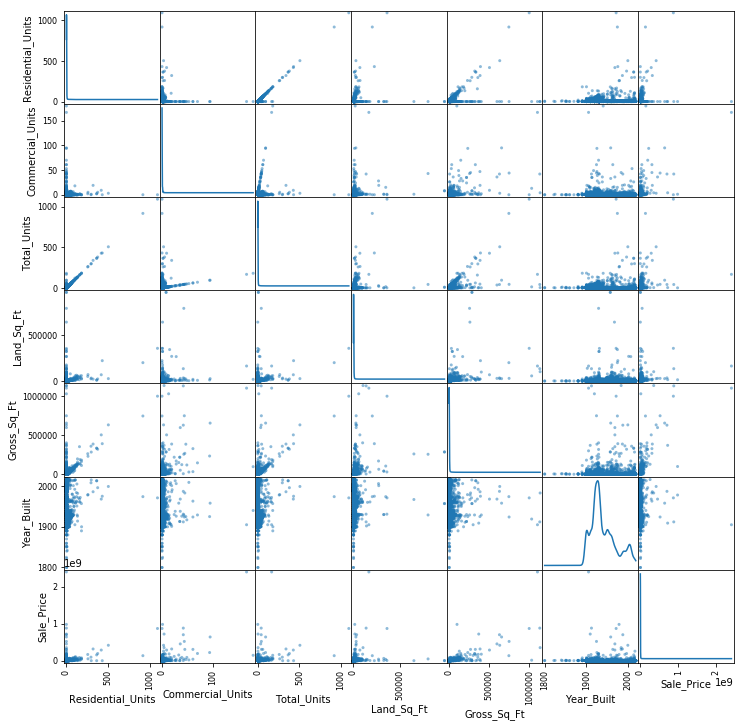

In [70]:
#ScatterMatrix to showcase correlations between variables we identified earlier
pd.scatter_matrix(data.loc[:,'Residential_Units':'Sale_Price'], figsize= (12,12),diagonal='kde')
#kde (kernel density estimation) changes the aesthetic for sale price more 

In [79]:
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'